<a href="https://colab.research.google.com/github/victoruwazurike1/Hamoye_Internship_Notebooks/blob/main/hamoye_stage_e_quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
df=pd.read_csv( "https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv" ) 

In [2]:
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [4]:
# Let us convert FullDate to a datetime dataframe
df['FullDate'] = pd.to_datetime(df['FullDate'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [6]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [7]:
# Let us schange the index so that we can resample
df.set_index('FullDate', inplace=True)

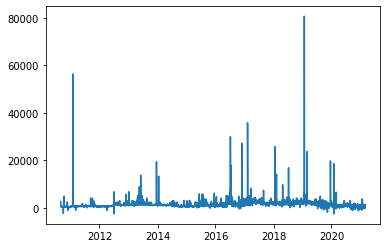

In [8]:
# We do not have any null values
# Now let us resample the data to make it daily data 
df_daily = df.resample('D').sum()
elec_df_daily = df_daily['ElecPrice']
tmax_df_daily = df_daily['Tmax']
sysload_df_daily = df_daily['SysLoad']
gasprice_df_daily = df_daily['GasPrice']
plt.plot(elec_df_daily)

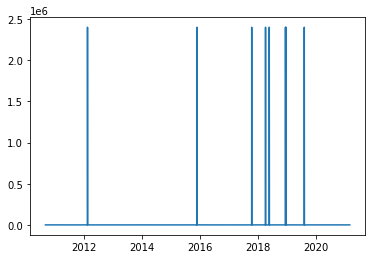

In [9]:
plt.plot(tmax_df_daily)

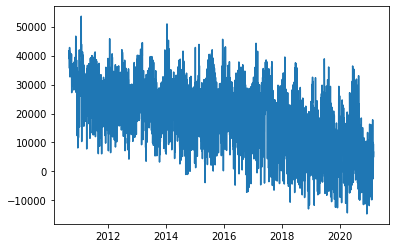

In [10]:
plt.plot(sysload_df_daily)

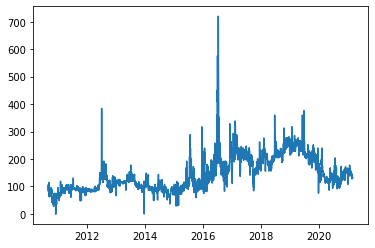

In [11]:
plt.plot(gasprice_df_daily)

In [12]:
elec_df_daily

FullDate
2010-09-01    2751.700
2010-09-02     570.810
2010-09-03     504.975
2010-09-04     502.275
2010-09-05     500.555
                ...   
2021-02-24     634.770
2021-02-25     577.515
2021-02-26    1445.495
2021-02-27     488.980
2021-02-28     -98.985
Freq: D, Name: ElecPrice, Length: 3834, dtype: float64

In [13]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3834 entries, 2010-09-01 to 2021-02-28
Freq: D
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       3834 non-null   float64
 1   SysLoad    3834 non-null   float64
 2   GasPrice   3834 non-null   float64
 3   ElecPrice  3834 non-null   float64
dtypes: float64(4)
memory usage: 149.8 KB


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


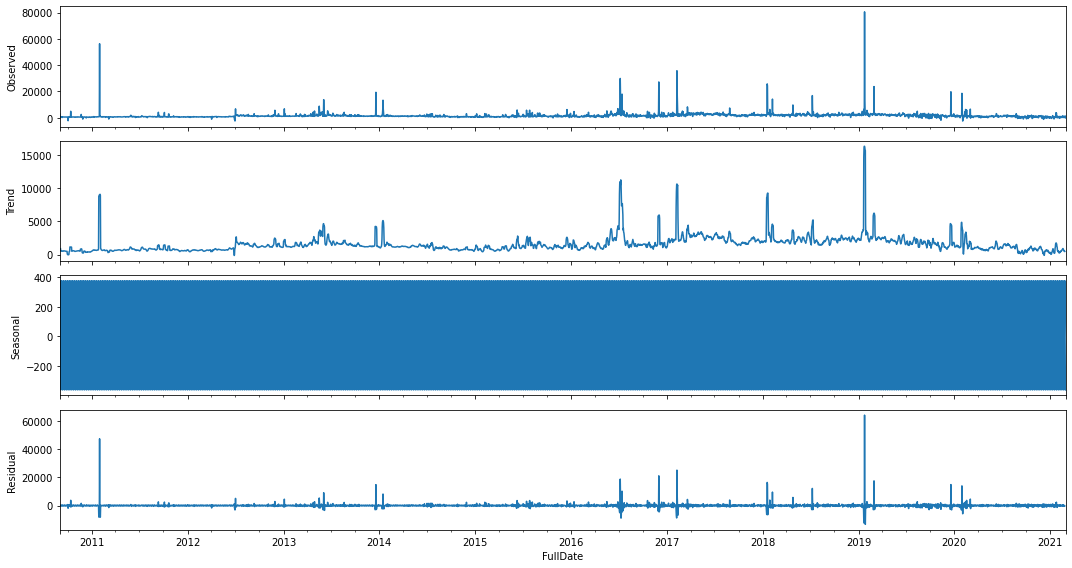

In [14]:
import statsmodels.api as sm
from pylab import rcParams
rcParams[ 'figure.figsize' ] = 15 , 8 
decompose_series = sm.tsa.seasonal_decompose(elec_df_daily, model= 'additive' ) 
decompose_series.plot() 
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(elec_df_daily)
print(f'ADF Statistic: {adf_result[ 0 ]} ' )
print(f'p-value: {adf_result[ 1 ]} ' )
print(f'No. of lags used: {adf_result[ 2 ]} ' )
print(f'No. of observations used : {adf_result[ 3 ]} ' )
print('Critical Values:' )
for k, v in adf_result[ 4 ].items():
  print( f' {k} : {v} ' )

ADF Statistic: -8.269053866873803 
p-value: 4.848817773711633e-13 
No. of lags used: 20 
No. of observations used : 3813 
Critical Values:
 1% : -3.432066157296446 
 5% : -2.8622983040036005 
 10% : -2.5671736550459663 


In [16]:
adf_result = adfuller(tmax_df_daily)
print(f'ADF Statistic: {adf_result[ 0 ]} ' )
print(f'p-value: {adf_result[ 1 ]} ' )
print(f'No. of lags used: {adf_result[ 2 ]} ' )
print(f'No. of observations used : {adf_result[ 3 ]} ' )
print('Critical Values:' )
for k, v in adf_result[ 4 ].items():
  print( f' {k} : {v} ' )

ADF Statistic: -20.766001357159357 
p-value: 0.0 
No. of lags used: 6 
No. of observations used : 3827 
Critical Values:
 1% : -3.4320598750004825 
 5% : -2.862295528895607 
 10% : -2.567172177683642 


In [38]:
adf_result = adfuller(sysload_df_daily)
print(f'ADF Statistic: {adf_result[ 0 ]} ' )
print(f'p-value: {adf_result[ 1 ]} ' )
print(f'No. of lags used: {adf_result[ 2 ]} ' )
print(f'No. of observations used : {adf_result[ 3 ]} ' )
print('Critical Values:' )
for k, v in adf_result[ 4 ].items():
  print( f' {k} : {v} ' )

ADF Statistic: -3.6901589888366457 
p-value: 0.004253725504574117 
No. of lags used: 30 
No. of observations used : 3803 
Critical Values:
 1% : -3.432070672988693 
 5% : -2.8623002987378547 
 10% : -2.567174716967499 


In [17]:
adf_result = adfuller(gasprice_df_daily)
print(f'ADF Statistic: {adf_result[ 0 ]} ' )
print(f'p-value: {adf_result[ 1 ]} ' )
print(f'No. of lags used: {adf_result[ 2 ]} ' )
print(f'No. of observations used : {adf_result[ 3 ]} ' )
print('Critical Values:' )
for k, v in adf_result[ 4 ].items():
  print( f' {k} : {v} ' )

ADF Statistic: -2.90276669716518 
p-value: 0.04502721288462542 
No. of lags used: 27 
No. of observations used : 3806 
Critical Values:
 1% : -3.4320693157877544 
 5% : -2.8622996992165364 
 10% : -2.5671743978048323 


In [18]:
# Let us implement a univariate model predicting ElecPrice
# We will start by creating a datafra,e that can be use by Prophet 
univariate_df = pd.DataFrame({'ds': elec_df_daily.index, 'y': elec_df_daily.values})

# Then we will split the data into train and test
univariate_train = univariate_df.iloc[:2757]
univariate_test = univariate_df.iloc[2757:]

# Now that we have split the data we can go ahead to fit our model
univariate_model = Prophet()
univariate_model.fit(univariate_train)

# Let us make predictions with our model

future = univariate_model.make_future_dataframe(periods=len(univariate_test), freq="D")
prediction = univariate_model.predict(future)

# Let us do some evaluation
y_pred = prediction['yhat'][2757:]
y_actual = univariate_test['y'] 

r2 = r2_score(y_actual, y_pred)
mae = mean_absolute_error(y_actual, y_pred)
mape = (np.abs(y_actual - y_pred) / np.abs(y_actual)).mean()
rmse = mean_squared_error(y_actual, y_pred, squared=False) 

print(r2)
print(mae)
print(mape)
print(rmse)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


-0.2518286167821573
1748.5192459342127
5.494751413716546
3218.15577651241


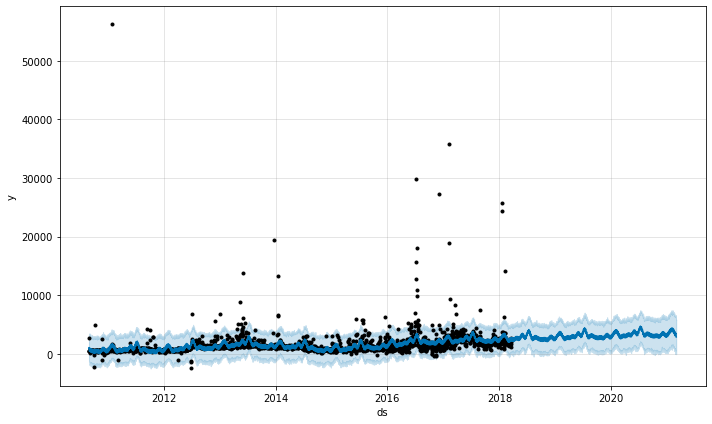

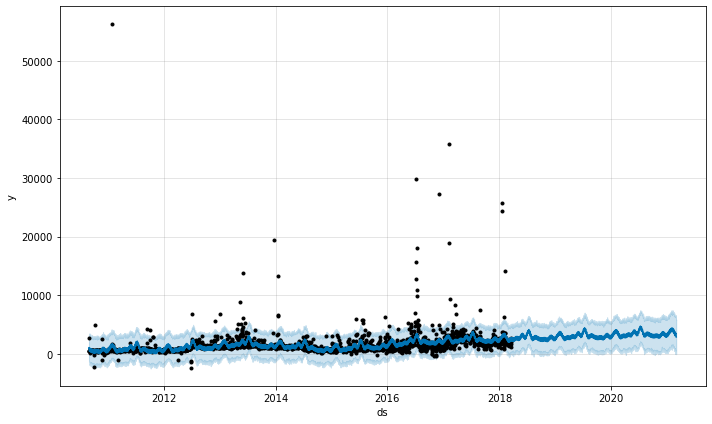

In [19]:
univariate_model.plot(prediction)

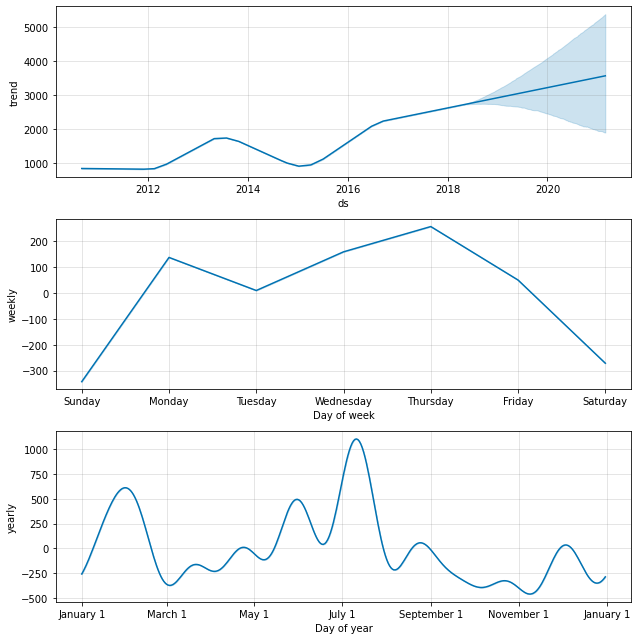

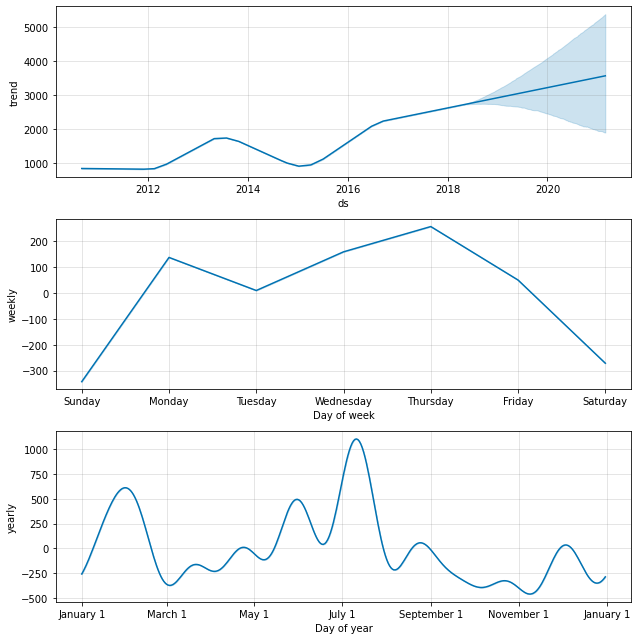

In [20]:
univariate_model.plot_components(prediction)

In [36]:
# Now let us implement a multivariate model to predict ElecPrice
multivariate_df = pd.DataFrame({'ds': elec_df_daily.index, 'y': elec_df_daily.values, 'add1' : sysload_df_daily.values, 'add2' : tmax_df_daily.values, 'add3' : gasprice_df_daily.values})

# Let us split the data
multivariate_train = multivariate_df.iloc[:2757]
multivariate_test = multivariate_df.iloc[2757:]

# Fit the model
multivariate_model = Prophet()
multivariate_model.add_regressor('add1')
multivariate_model.add_regressor('add2')
multivariate_model.add_regressor('add3')
multivariate_model.fit(multivariate_train)

future_2 = multivariate_model.make_future_dataframe(periods = len(multivariate_test), freq = 'D')
future_2["add1"] = multivariate_df.add1.values
future_2["add2"] = multivariate_df.add2.values
future_2["add3"] = multivariate_df.add3.values
predictions_2 = multivariate_model.predict(future_2)

# Let us evaluate results
y_pred_2 = predictions_2["yhat"][2757:]
y_actual_2 = multivariate_test['y']

r2 = r2_score(y_actual_2, y_pred_2)
mae = mean_absolute_error(y_actual_2, y_pred_2)
mape = (np.abs(y_actual_2 - y_pred_2) / np.abs(y_actual_2)).mean()
rmse = sqrt(mean_squared_error(y_actual_2, y_pred_2))

print(r2)
print(mae)
print(mape)
print(rmse)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0.11252335174615336
992.9655725838658
2.337449470281957
2709.6493421662344


In [35]:
multivariate_df

,ds,y,add1,add2,add3
0,2010-09-01,2751.700,41565.38000,379.2,88.5600
1,2010-09-02,570.810,38898.99000,369.6,88.5600
2,2010-09-03,504.975,41665.76000,439.2,106.8000
3,2010-09-04,502.275,35638.08500,328.8,81.3600
4,2010-09-05,500.555,35611.41000,357.6,106.8000
...,...,...,...,...,...
3829,2021-02-24,634.770,-1525.49745,537.6,134.4000
3830,2021-02-25,577.515,4539.07855,518.4,130.5048
3831,2021-02-26,1445.495,9517.02430,547.2,130.1808
3832,2021-02-27,488.980,4932.88015,564.0,130.0800


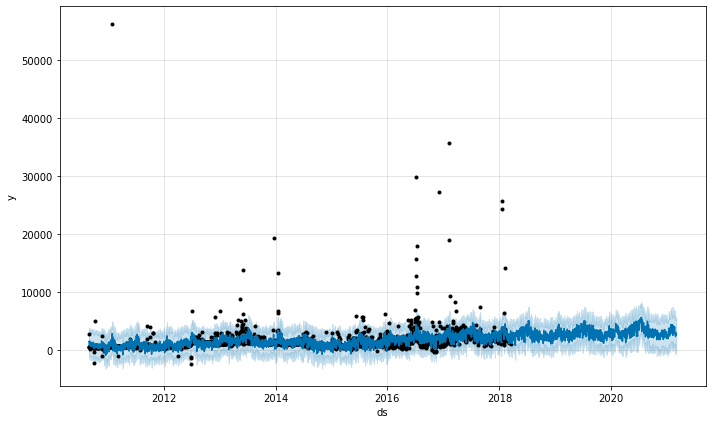

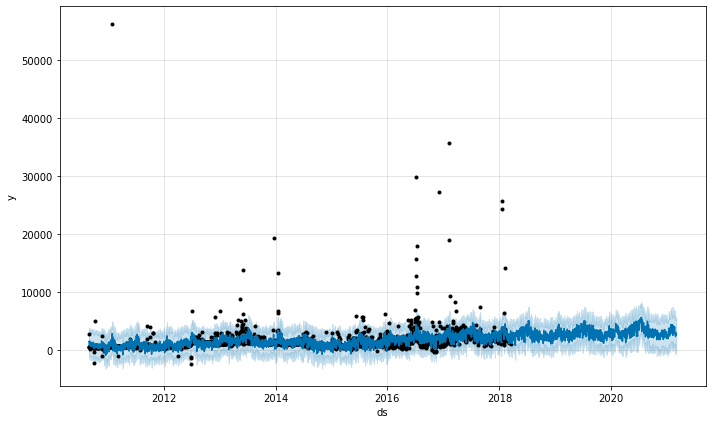

In [22]:
multivariate_model.plot(predictions_2)

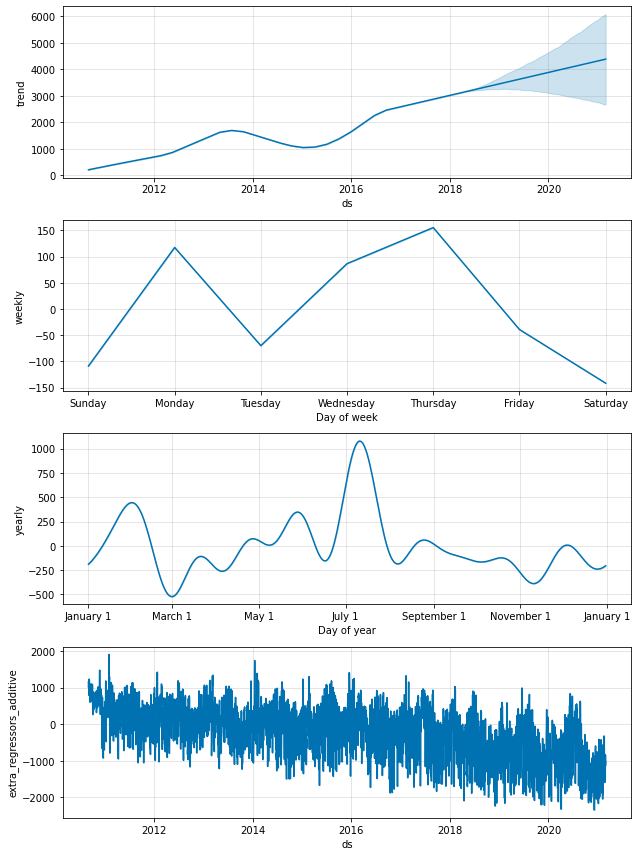

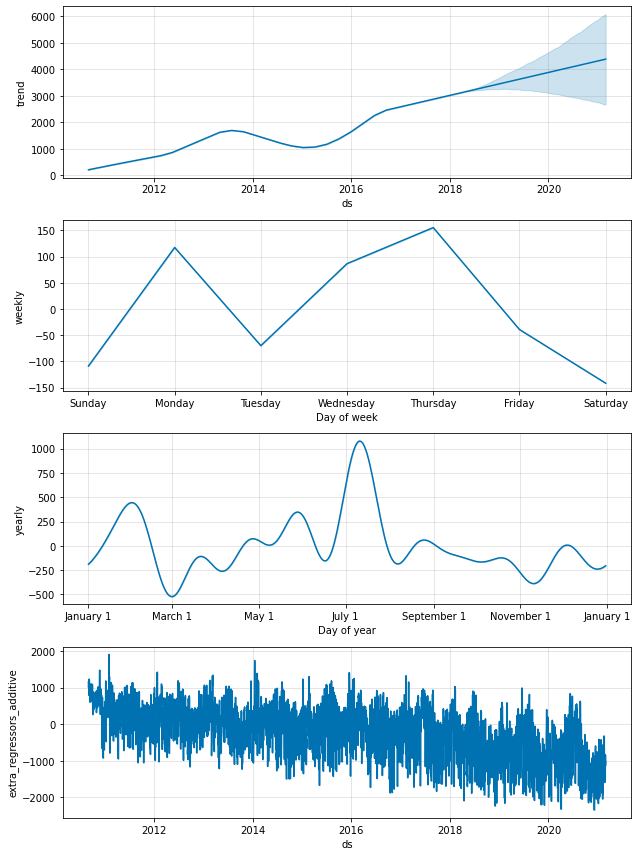

In [23]:
multivariate_model.plot_components(predictions_2)

In [42]:
multivariate_df2 = pd.DataFrame({'ds': elec_df_daily.index, 'y': elec_df_daily.values, 'add1' : sysload_df_daily.values, 'add2' : gasprice_df_daily.values})

#split data
multivariate_train2 = multivariate_df2.iloc[:2757]
multivariate_test2 = multivariate_df2.iloc[2757:]

#fit model
multivariate_model2 = Prophet()
multivariate_model2.add_regressor('add1')
multivariate_model2.add_regressor('add2')
multivariate_model2.fit(multivariate_train2)

#make predictions
future_3 = multivariate_model2.make_future_dataframe(periods=len(multivariate_test2), freq="D")
future_3["add1"] = multivariate_df2.add1.values
future_3["add2"] = multivariate_df2.add2.values
predictions_3 = multivariate_model2.predict(future_3)

#evaluate results
y_pred_3 = predictions_3["yhat"][2757:]
y_actual_3 = multivariate_test2['y']
r2 = r2_score(y_actual_3, y_pred_3)
mae = mean_absolute_error(y_actual_3, y_pred_3)
mape = ((np.abs((y_actual_3 - y_pred_3) / (y_actual_3))) * 100).mean()
rmse = sqrt(mean_squared_error(y_actual_3, y_pred_3)) 

print(r2)
print(mae)
print(mape)
print(rmse)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


0.11037042589676793
1003.6214646918181
236.66321133599126
2712.934014746932


In [43]:
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100


print(mape(y_actual_3, y_pred_3))

236.66321133599143
